### Análise de Dados e frequência textual

Frequência dos 20 tokens mais frequentes nos reviews da base Amazon.

In [40]:
# importando bibliotecas
import nltk  
import spacy  
import pandas as pd  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud
from collections import Counter 
from nltk.corpus import stopwords  
import re
import string

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lf060\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lf060\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df = pd.read_csv('am_scrape_final.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Search Query   9815 non-null   object
 1   Product Title  9815 non-null   object
 2   Link           9815 non-null   object
 3   Review         9815 non-null   object
dtypes: object(4)
memory usage: 306.8+ KB


In [21]:
df.describe()

,Search Query,Product Title,Link,Review
count,9815,9815,9815,9815
unique,41,908,909,7668
top,smartphone,"Mochila de viagem grande feminina, mochila de ...",https://www.amazon.com.br/dp/B0B2XSVJWX,Muito bom
freq,664,30,20,53


In [22]:
df.head()

,Search Query,Product Title,Link,Review
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas..."
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e..."


### Base de dados
Diferentemente da base de dados da aula as revisões não parece ter links ou caracteres de email, apenas data, valores de compra e pontuação.

Vou fazer a normalização e preprocessamento dessas questões.

Quando fui analisar as 20 palavras mais frequentes notei que tem avaliações em diferentes linguagens, como inglês e espanhol. O grande ponto é que o inglês usa muito o "the" para fazer ligações entre palavras, sendo assim ela foi destaque entre as palavras mais frequentes. Dessa forma, fiz o preprocessamento de Sw dessas palavras

In [60]:
# normalização e remoção de stopwords 
def preprocessing(text):
    text = text.lower()
        
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    stop_pt = set(stopwords.words('portuguese'))
    stop_en = set(stopwords.words('english'))
    stop_es = set(stopwords.words('spanish'))

    stop_all = stop_pt | stop_en | stop_es
    text = ' '.join([word for word in text.split() if word not in stop_all])


    return text

In [61]:
df['clean_review'] = df['Review'].apply(preprocessing)
df.head()

,Search Query,Product Title,Link,Review,clean_review,tokens
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,necessidade comprar celular custo benefício co...,"[necessidade, comprar, celular, custo, benefíc..."
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,experiência dias uso xiaomi redmi note gb gb r...,"[experiência, dias, uso, xiaomi, redmi, note, ..."
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",smartphone qualidade esperava boas configuraçõ...,"[smartphone, qualidade, esperava, boas, config..."
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,atendeu mto expectativas usava samsung mudei p...,"[atendeu, mto, expectativas, usava, samsung, m..."
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",gostei celular resposta rápida ótimo jogar fre...,"[gostei, celular, resposta, rápida, ótimo, jog..."


### Tokenização

Para verificar as 20 palavras com mais frequência é necessária realizar a tokenização por palavras.

Usarei nltk  spacy

In [62]:
nlp = spacy.load('pt_core_news_sm')

def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

In [63]:
df['tokens'] = df['clean_review'].apply(tokenize_text)

In [64]:
#Testando se funcionou
df.head()

,Search Query,Product Title,Link,Review,clean_review,tokens
0,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Com a necessidade de comprar um celular custo ...,necessidade comprar celular custo benefício co...,"[necessidade, comprar, celular, custo, benefíc..."
1,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,Minha experiência de 10 dias de uso com o Xiao...,experiência dias uso xiaomi redmi note gb gb r...,"[experiência, dias, uso, xiaomi, redmi, note, ..."
2,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Smartphone de qualidade como já esperava, boas...",smartphone qualidade esperava boas configuraçõ...,"[smartphone, qualidade, esperava, boas, config..."
3,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,atendeu mto minhas expectativas. Antes eu usa...,atendeu mto expectativas usava samsung mudei p...,"[atendeu, mto, expectativas, usava, samsung, m..."
4,smartphone,Smartphone Xiaomi Note 12 4G 128GB 6GB Ram (VE...,https://www.amazon.com.br/dp/B0BZ7RJDHD,"Gostei muito do celular, tem resposta rápida e...",gostei celular resposta rápida ótimo jogar fre...,"[gostei, celular, resposta, rápida, ótimo, jog..."


### Após a tokenização pegamos as 20 palavras mais comuns dentre as avaliações

In [65]:
palavras = [token for rv in df['tokens'] for token in rv]
palavras_freq = Counter(palavras)
palavras_freq_20 = palavras_freq.most_common(20)
print('20 Tokens mais comuns:', palavras_freq_20)

20 Tokens mais comuns: [('produto', 2292), ('bem', 2213), ('bom', 1985), ('qualidade', 1372), ('pra', 1087), ('boa', 1042), ('excelente', 1036), ('chegou', 944), ('ótimo', 909), ('recomendo', 907), ('gostei', 851), ('uso', 811), ('super', 774), ('pouco', 660), ('entrega', 644), ('camera', 636), ('comprei', 619), ('bateria', 607), ('som', 604), ('rápido', 603)]


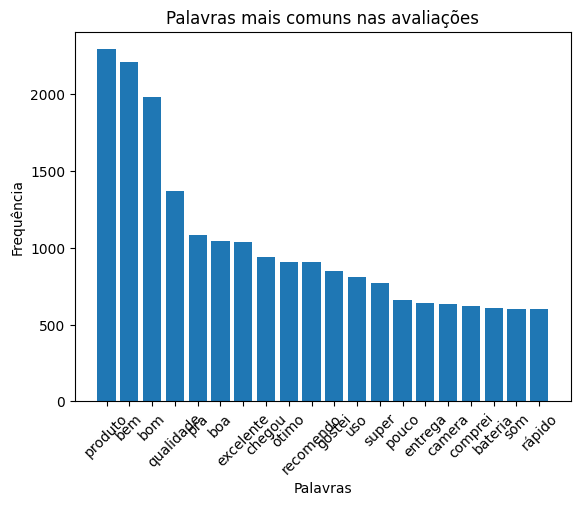

In [66]:
# Visualizando as palavras mais comuns
words, counts = zip(*palavras_freq_20)
plt.bar(words, counts)
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.title('Palavras mais comuns nas avaliações')
plt.show()

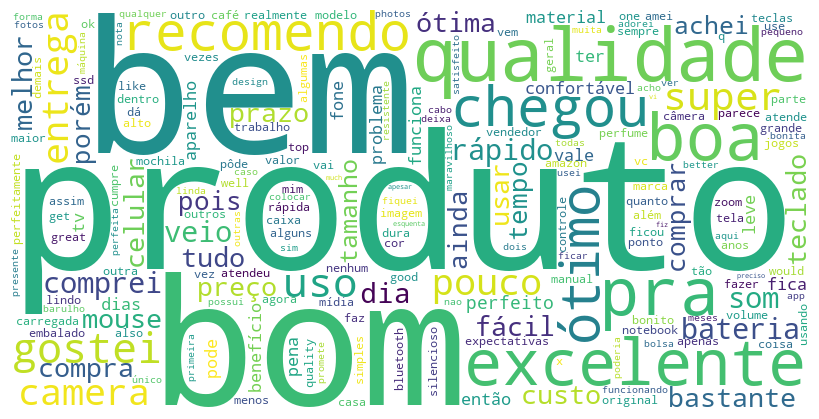

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavras_freq)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### Analisando a visualização de dados.

O gráfico de barras apresenta os termos mais recorrentes, mas como a maior parte das avaliações está em português, os resultados ficam enviesados para esse idioma. As palavras em inglês e espanhol acabam aparecendo pouco ou diluídas na visualização, mesmo que estejam presentes.

A nuvem de palavras evidencia que a maior parte dos comentários está em português, mas também aparecem palavras em inglês (“like”, “quality”) e até em espanhol, ainda que em menor quantidade. Isso mostra que a base é multilíngue, o que pode influenciar as análises se não for tratado no pré-processamento.

para um mundo ideal, talvez fosse melhor localizar os comentários com diferentes idiomas separar e fazer essa análise para cada um.
